# Cross-Validation & Simple Linear Regression

In [59]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statistics 
import statsmodels.formula.api as smf
from scipy.stats import pearsonr
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [60]:
Salaries = pd.read_csv('salary.csv')
Salaries.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


In [6]:
Salaries.isnull().sum()

salary         1
exprior        0
yearsworked    0
yearsrank      0
market         0
degree         0
otherqual      0
position       0
male           0
Field          0
yearsabs       0
dtype: int64

In [9]:
Salaries_df =  Salaries.dropna()

In [34]:
x1 = Salaries[['yearsworked']]
y = Salaries['salary']
x = sm.add_constant(x1.values)


In [66]:
# - Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


### Plotting a histogram

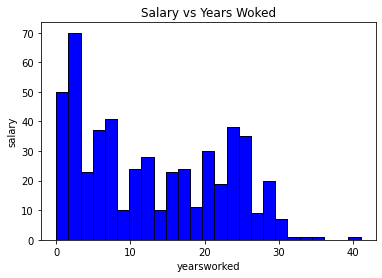

In [67]:
plt.hist(Salaries_df['yearsworked'], color = 'blue', edgecolor = 'black',
         bins = int(25))

# seaborn histogram
sns.distplot(Salaries_df['yearsworked'], hist=True, kde=False, 
             bins=int(25), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Salary vs Years Woked')
plt.xlabel('yearsworked')  
plt.ylabel('salary') 
plt.show()

In [68]:
%matplotlib inline

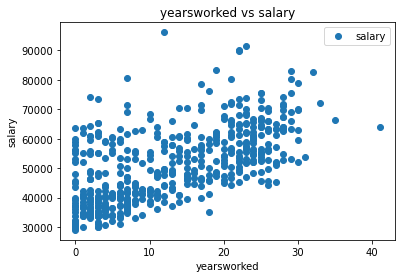

In [69]:
Salaries_df.plot(x='yearsworked', y='salary', style='o')  
plt.title('yearsworked vs salary')  
plt.xlabel('yearsworked')  
plt.ylabel('salary')  
plt.show()

####  Are the data appropriate for linear regression? Is there anything that needs to be transformed or edited first?


In [70]:
pearsonr(Salaries_df['yearsworked'],Salaries_df['salary'])


(0.6235888657598049, 1.2873351342915672e-56)

• This show a positive linear relationship. The data is appropriate for linear regression.

There's is no need to transform our dataset

### Using the stasmodels package and the training data, run a simple linear regression for Salary with one predictor variable: Years Worked.


In [71]:
model = sm.OLS(y_train,x_train).fit()

In [72]:
predictions = model.predict(x_test)

Text(0, 0.5, 'y - Predicted')

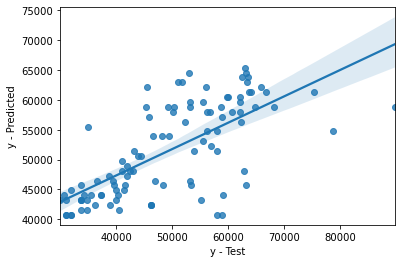

In [73]:
sns.regplot(y_test,predictions)
plt.xlabel('y - Test')
plt.ylabel('y - Predicted')

In [74]:
print_model = model.summary()
print_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     241.1
Date:                Fri, 24 Apr 2020   Prob (F-statistic):           4.45e-43
Time:                        17:38:36   Log-Likelihood:                -4373.8
No. Observations:                 411   AIC:                             8752.
Df Residuals:                     409   BIC:                             8760.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.072e+04    842.645     48.327      0.000    3.91e+04    4.24e+04
x1           822.9658     52.998     15.528      0.000     718.784     927.148
==============================================================================
Omnibus:                       61.581   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.210
Skew:                           1.014   Prob(JB):                     1.15e-19
Kurtosis:                       3.992   Cond. No.                         26.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Does the model significantly predict the dependent variable? Report the amount of variance explained (R^2) and significance value (p) to support your answer.

The model does not significantly predict the dependant variable as the R^2 value is 0.366, which is really low. This value is statistically significant as the p-value is 0.00.

#### What percentage of the variance in employees’ salaries is accounted for by the number of years they have worked?

In [75]:
model.rsquared


0.37089338062199007

The percentage is 36.631% of employees’ salaries is accounted for by the number of years they have worked



In [76]:
model.pvalues

const    3.655397e-171
x1        4.451683e-43
dtype: float64

#### What does the unstandardized coefficient (B or ‘coef’ in statsmodels) tell you about the relationship between Years Worked and Salary?

The 95% confidence intervals [0.025, 0.975] are [710.577 - 942.509] and this is the range in which our coffecient is likely to fall.

#### Calculate the expected salary for someone with 12 years’ work experience.

In [77]:
model.predict(pd.DataFrame({'conts':1.0,'yars':[12]}))


0    50597.942794
dtype: float64

A person with 12 years work experience will most likely be earning a salary of R 50 597.942

#### Calculate the expected salary for someone with 80 years’ work experience. Are there any problems with this prediction? If so, what are they?

In [78]:
model.predict(pd.DataFrame({'conts':1.0,'years':[80]}))


0    106559.618582
dtype: float64

A person with 80 years work experience will most likely be earning a salary of R106 559.618

#### We have only looked at the number of years an employee has worked. What other employee characteristics might influence their salary?

In [79]:
Salaries_df.corr().head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
salary,1.000000,0.119989,0.623589,0.610706,0.407214,0.044554,0.167137,0.702122,0.361564,-0.499316,-0.069630
exprior,0.119989,1.000000,-0.245788,-0.065893,-0.035202,-0.049165,0.264655,0.118031,0.047276,-0.046854,0.132022
yearsworked,0.623589,-0.245788,1.000000,0.813456,-0.070740,0.028122,-0.040157,0.746311,0.278286,-0.264208,0.056113
yearsrank,0.610706,-0.065893,0.813456,1.000000,-0.026869,0.006347,0.007232,0.484891,0.237397,-0.265620,0.035962
market,0.407214,-0.035202,-0.070740,-0.026869,1.000000,0.036456,0.021641,-0.013116,0.181401,-0.223887,-0.167177


Another characteristic that can influence someones salary is the years worked.

##### Now fit your model to your test set. DO NOT BUILD A NEW MODEL ON THE TEST SET! Simply use your existing, model, to predict salaries in the test set.